# Проект: Обучение с учителем: качество модели

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Как решать задачу**

Продумывать подход к решению этой задачи вам не придётся — руководитель отдела его уже сформировал:
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
   - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
   - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
   - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
   - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
   
Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.


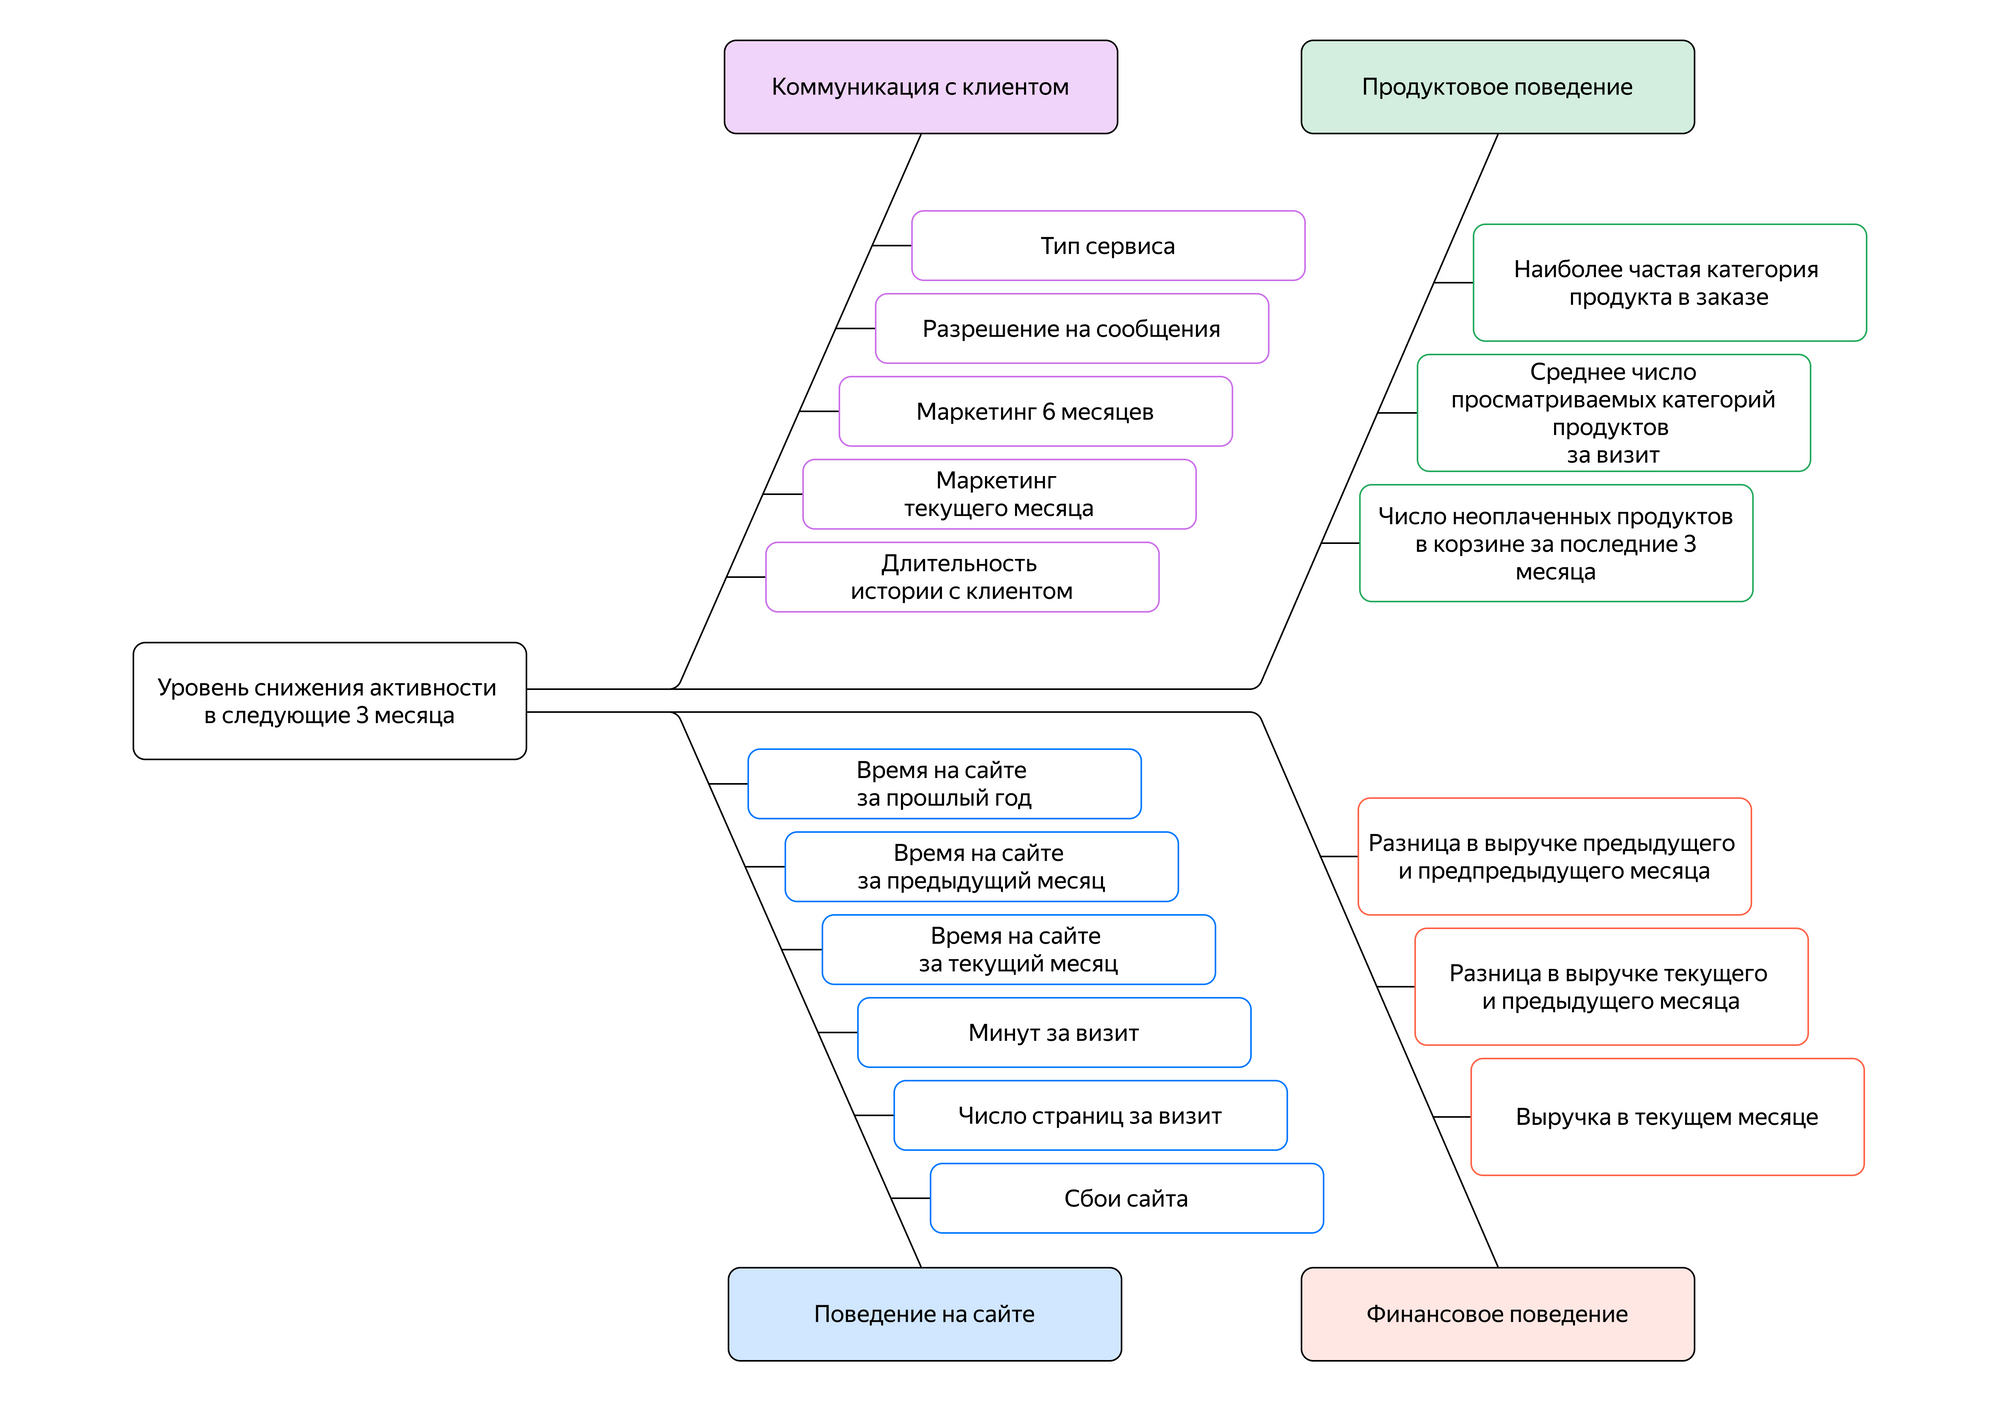

1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Руководство одобрило описание решения, и вам, как специалисту по DS, нужно его реализовать.

**Описание данных**

Данные для работы находятся в нескольких таблицах. 

*market_file.csv*

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив 6 мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

*market_money.csv*

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

*market_time.csv*

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

*money.csv*

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

**Инструкция по выполнению проекта**

Решать задачу вам нужно в два этапа:
1. Разработайте модель, которая предскажет вероятность снижения покупательской активности.
2. Выделите сегмент покупателей, проанализируйте его и предложите, как увеличить его покупательскую активность. Используйте данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). По желанию вы можете проанализировать больше одного сегмента.

Ниже несколько примеров сегментов, но вы также можете выделить свой:

- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
- Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
- Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
- Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

## Загрузка данных

In [1]:
!pip install phik -q
!pip install shap -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import shap
import phik

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

from sklearn.metrics import roc_auc_score

import warnings

warnings.filterwarnings("ignore")
mpl.style.use(['bmh'])


**Константы**

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [3]:
try:
    df_market = pd.read_csv('market_file.csv', sep=',')
except:
    df_market = pd.read_csv('/datasets/market_file.csv', sep=',')

try:
    df_market_money = pd.read_csv('market_money.csv', sep=',')
except:
    df_market_money = pd.read_csv('/datasets/market_money.csv', sep=',')
    
try:
    df_market_time = pd.read_csv('market_time.csv', sep=',')
except:
    df_market_time = pd.read_csv('/datasets/market_time.csv', sep=',')
    
try:
    df_money = pd.read_csv('money.csv', sep=';', decimal = ',')
except:
    df_money = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')

<div style="background-color: Gainsboro; padding: 10px"> <b>df_market</b> 
</div>

In [4]:
df_market.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Таблица df_market включает в себя 1300 записей и 13 признаков. Пропущенных значений нет. Данные полностью соответствуют описанию, включая типы данных в столбцах. Несмотря на то, что по заданию названия можно оставить на кириллице, я хочу привести их к нижнему регистру и заменить пробелы на символ "_". Кроме того, в дальнейшем переведу значения признаков с типом object в нижний регистр.

In [6]:
df_market.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Значения числовых данных соответствуют ожидаемым диапазонам; аномальных значений не обнаружено.

In [7]:
df_market.describe(include='object')

,Покупательская активность,Тип сервиса,Разрешить сообщать,Популярная_категория
count,1300,1300,1300,1300
unique,2,3,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,914,962,330


Категориальные данные в целом соответствуют ожиданиям. Однако необходимо обратить внимание на признак "тип сервиса", поскольку у него обнаружено три уникальных значения вместо ожидаемых двух для бинарного признака. Это связано с неявным дубликатом "стандартт", который был замечен при просмотре первых пяти наблюдений. Также следует обратить внимание на признак "популярная_категория" и проверить его на наличие неявных дубликатов.

<div style="background-color: Gainsboro; padding: 10px"> <b>df_market_money</b> 
</div>

In [8]:
df_market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [9]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


В таблице df_market_money содержится 3900 наблюдений и 3 столбца. Пропусков нет. Данные и их типы соответствуют описанию. Также в дальнейшем я приведу названия столбцов к нижнему регистру.

In [10]:
df_market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Номера id имеют те же минимальные и максимальные значения, что и в таблице df_market; выручка находится в допустимых диапазонах, но максимальное значение выручки сильно отличается от медианного. Возможно это выброс.

In [11]:
df_market_money.describe(include='object')

,Период
count,3900
unique,3
top,препредыдущий_месяц
freq,1300


В столбце "период" представлены три уникальных значения, а именно: текущий месяц, предыдущий месяц и препредыдущий месяц.

<div style="background-color: Gainsboro; padding: 10px"> <b>df_market_time</b> 
</div>

In [12]:
df_market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [13]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


В таблице df_market_time содержится 2600 наблюдений и 3 столбца. Пропусков нет. Данные и типы данных соответствуют описанию. Также в дальнейшем я приведу названия столбцов к нижнему регистру.

In [14]:
df_market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Время пребывания покупателя на сайте варьируется от 4 до 23 минут. id совпадают с таблицей df_market.

In [15]:
df_market_time.describe(include='object')

,Период
count,2600
unique,2
top,предыдцщий_месяц
freq,1300


В данном случае мы располагаем данными за два месяца: текущий и предыдущий.

<div style="background-color: Gainsboro; padding: 10px"> <b>df_money</b> 
</div>

In [16]:
df_money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [17]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Таблица df_money содержит 1300 записей и 2 столбца. Пропущенных значений нет. Данные и их типы полностью соответствуют описанию.

In [18]:
df_money.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


id совпадают с таблицей df_market. В столбце "прибыль" отсутствуют аномальные значения. Однако не совсем ясно, в каких единицах измеряется этот показатель.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> подводя итог первичного анализа данных, можно отметить, что все четыре предоставленные таблицы — df_market, df_market_money, df_market_time и df_money — содержат полные данные без пропущенных значений, а типы данных в столбцах соответствуют ожидаемым форматам. Номера id в таблицах согласованы между собой, что позволит в дальнейшем успешно объединять данные из разных источников.
    
Следующим ключевым шагом является предобработка данных, которая необходима для обеспечения качества и надежности дальнейшего анализа. В рамках предобработки предстоит:

- Привести названия столбцов во всех таблицах к единому стилю: использовать нижний регистр и заменить пробелы на символ подчеркивания _. Это повысит удобство работы с данными и снизит вероятность ошибок из-за разницы в написании.
  
- Привести строковые значения признаков типа object к нижнему регистру. Это поможет унифицировать категории и упростит их обработку.

- Устранить неявные дубликаты в категориальных признаках. Особое внимание следует уделить:
  - Признаку "тип сервиса": исправить опечатку "стандартт" на "стандарт".
  - Признаку "популярная_категория": проверить на наличие дублирующих или сходных по написанию категорий.
    
Также на этапе исследовательского анализа стоит обратить внимание на столбец "Выручка" в датафрейме df_market_money.
</div>

## Предобработка данных

<div style="background-color: Gainsboro; padding: 10px"> <b>Единый стиль</b> 
</div>

In [19]:
def make_good_style(df):
    """
    Вход: датафрейм
    Выход: датафрейм хорошего стиля
    """
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    cat_col_names = df.select_dtypes(exclude='number').columns.tolist()
    for column in cat_col_names:
        df[column] = df[column].str.lower().str.replace(' ', '_')


In [20]:
df_list = [df_market, df_market_money, df_market_time, df_money]

for df in df_list:
    make_good_style(df)

Все датафреймы были унифицированы: изменены названия столбцов и обновлены значения категориальных переменных для соответствия единому стилю.

<div style="background-color: Gainsboro; padding: 10px"> <b>Дубликаты</b> 
</div>

In [21]:
def search_duplicated(df):
    """
    Вход: датафрейм
    Выход: Количество явных дубликатов и уникальные значения столбцов датафрейма
    """
    duplicated_sum = df.duplicated().sum()
    print(f'Количество дубликатов в: {duplicated_sum}')
    print()
    cat_col_names = df.select_dtypes(exclude='number').columns.tolist()
    for column in cat_col_names:
        print(f'Уникальные значения столбца {column}: {df[column].unique()}')

In [22]:
search_duplicated(df_market)

Количество дубликатов в: 0

Уникальные значения столбца покупательская_активность: ['снизилась' 'прежний_уровень']
Уникальные значения столбца тип_сервиса: ['премиум' 'стандартт' 'стандарт']
Уникальные значения столбца разрешить_сообщать: ['да' 'нет']
Уникальные значения столбца популярная_категория: ['товары_для_детей' 'домашний_текстиль' 'косметика_и_аксесуары'
 'техника_для_красоты_и_здоровья' 'кухонная_посуда'
 'мелкая_бытовая_техника_и_электроника']


Обратим внимание на неявные дубликаты в столбце 'тип_сервиса', поскольку остальные столбцы корректны.

In [23]:
df_market['тип_сервиса'] = df_market['тип_сервиса'].replace('стандартт', 'стандарт')

In [24]:
df_market['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Все неявные дубликаты теперь отсутствуют.

In [25]:
search_duplicated(df_market_money)

Количество дубликатов в: 0

Уникальные значения столбца период: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [26]:
search_duplicated(df_market_time)

Количество дубликатов в: 0

Уникальные значения столбца период: ['текущий_месяц' 'предыдцщий_месяц']


In [27]:
df_market_time['период'] = df_market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [28]:
search_duplicated(df_market_time)

Количество дубликатов в: 0

Уникальные значения столбца период: ['текущий_месяц' 'предыдущий_месяц']


In [29]:
search_duplicated(df_money)

Количество дубликатов в: 0



Все остальные датафреймы в порядке.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> в результате проведённой предобработки данных все датафреймы были унифицированы: переименованы названия столбцов и обновлены значения категориальных переменных для соответствия единому стилю. Особое внимание было уделено неявным дубликатам в столбце 'тип_сервиса', также были обнаружены неявные дубликаты в датафрейме df_market_time в столбце «Период».; они были обнаружены и устранены, остальные столбцы корректны. Теперь все неявные дубликаты отсутствуют, и все датафреймы находятся в порядке. Данные готовы для дальнейшего этапа анализа.
</div>

## Исследовательский анализ данных

<div style="background-color: Gainsboro; padding: 10px"> <b>df_market</b> 
</div>

In [30]:
def get_info(df, column, bins=(df.shape[0] // 10)):
    """
    Визуализирует распределение данных в заданном столбце датафрейма.

  Args:
    df: pandas.DataFrame, датафрейм, содержащий данные.
    column: str, название столбца, для которого нужно построить визуализацию.
    bins: int, количество корзин для гистограммы.

  Returns:
    Функция отображает график в зависимости от типа столбца (категориальный, дискретный, непрерывный).
    """
    if df[column].dtypes == 'int64' or df[column].dtypes == 'float64':
        
        if df[column].nunique() <= 20:#дискретный
            print(df[column].describe())
            
            pivot_table = df.pivot_table(index=column, 
                                   values='id', 
                                   aggfunc='count')

            ax = pivot_table.plot(kind='bar', figsize=(12, 8))

            for p in ax.patches:
                ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10), textcoords='offset points')

            plt.ylabel('Количество наблюдений')
            plt.title('Распределение признака ' + column)
            
        else:#непрерывный
            print(df[column].describe())
        
            fig = plt.figure(figsize=(12, 8))
            grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
        
            ax_main = fig.add_subplot(grid[:-1, :-1])
            ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
        
            ax_main.hist(df[column], bins=bins, edgecolor='black')
            sns.boxplot(x=df[column], ax=ax_bottom)
            ax_main.set(title='Распределение признака ' + column, ylabel='Количество наблюдений')
        
    else:#категориальный
        print(df[column].value_counts())
        
        fig = plt.figure(figsize=(12, 8))
        df[column].value_counts().plot(kind = 'pie', autopct='%1.0f%%',
                                       wedgeprops=dict(width=0.3),
                                       title = column, ylabel='')
       
    plt.show()

прежний_уровень    802
снизилась          498
Name: покупательская_активность, dtype: int64


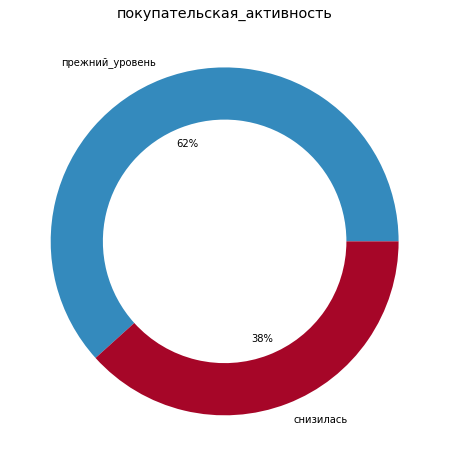

In [31]:
get_info(df_market, 'покупательская_активность')

- Целевой признак имеет два класса с распределением 62% и 38%. Несмотря на некоторое преобладание класса "прежний_уровень", сильного дисбаланса нет.
- Это позволяет использовать стандартные методы анализа и моделирования без существенной коррекции на дисбаланс классов.

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64


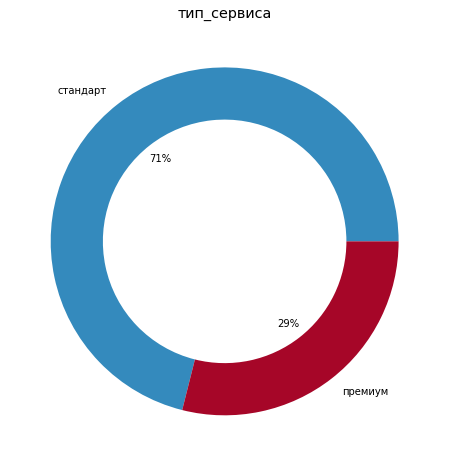

In [32]:
get_info(df_market, 'тип_сервиса')

   - 71% клиентов пользуются стандартным сервисом.
   - 29% клиентов выбирают премиум-сервис.

да     962
нет    338
Name: разрешить_сообщать, dtype: int64


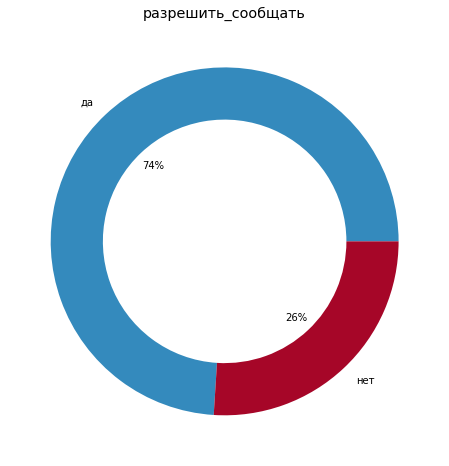

In [33]:
get_info(df_market, 'разрешить_сообщать')

- 74% клиентов дали согласие на получение сообщений.
- 26% клиентов отказались от коммуникаций.

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


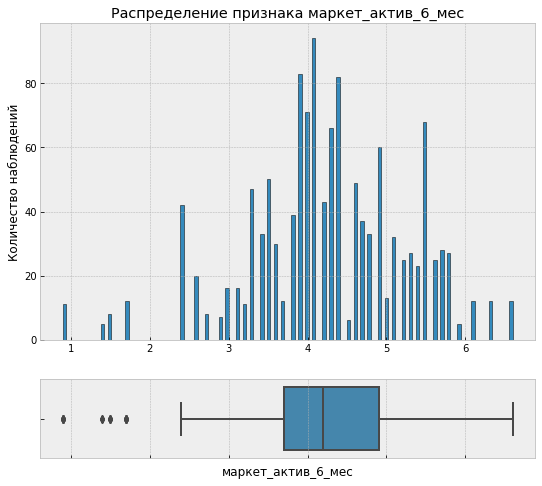

In [34]:
get_info(df_market, 'маркет_актив_6_мес')

Клиенты в среднем демонстрируют хороший уровень маркетинговой активности за последние 6 месяцев. 
- Диапазон значений: от 0.9 до 6.6
- Разброс значений относительно среднего невелик, что свидетельствует о относительно равномерном распределении.
- Среднее значение составляет 4.2538, что близко к медиане 4.2. Это указывает на симметричность распределения данных без существенного смещения влево или вправо.

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


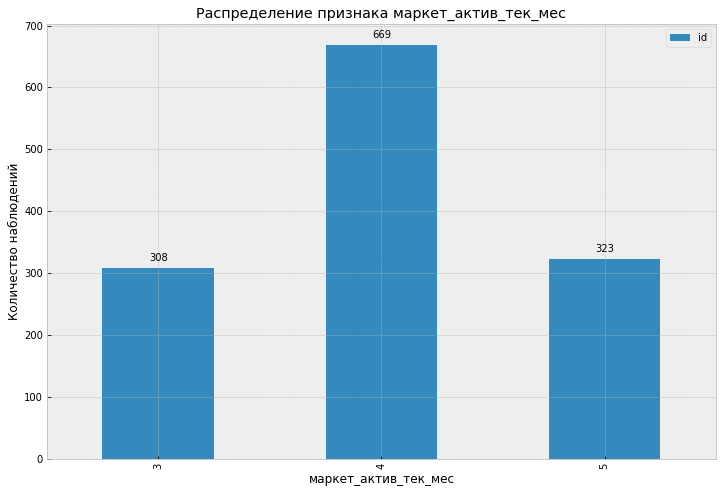

In [35]:
get_info(df_market, 'маркет_актив_тек_мес')

Данные имеют всего три значения (3.0, 4.0 и 5.0). 

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


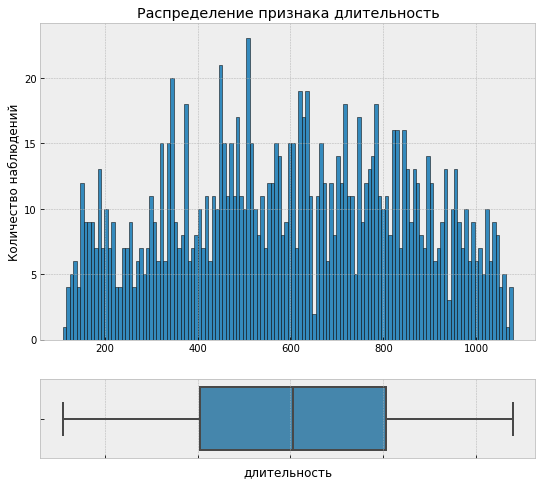

In [36]:
get_info(df_market, 'длительность')

Длительность — это показатель, указывающий, сколько дней прошло с момента регистрации покупателя на сайте. В данных заметны локальные пики и спады, что может свидетельствовать о проведении маркетинговых активностей в определённые дни.

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


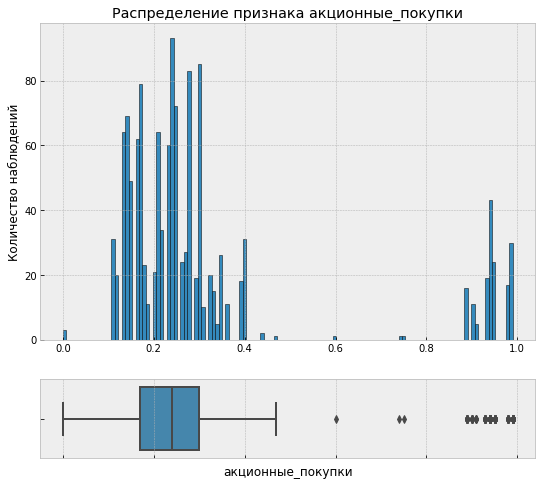

In [37]:
get_info(df_market, 'акционные_покупки')

Наблюдается четкая сегментация покупателей по отношению к акциям:  часть клиентов совершает покупки вне зависимости от наличия скидки, в то время как другая часть приобретает товары только в период действия акций.

товары_для_детей                        330
домашний_текстиль                       251
косметика_и_аксесуары                   223
техника_для_красоты_и_здоровья          184
мелкая_бытовая_техника_и_электроника    174
кухонная_посуда                         138
Name: популярная_категория, dtype: int64


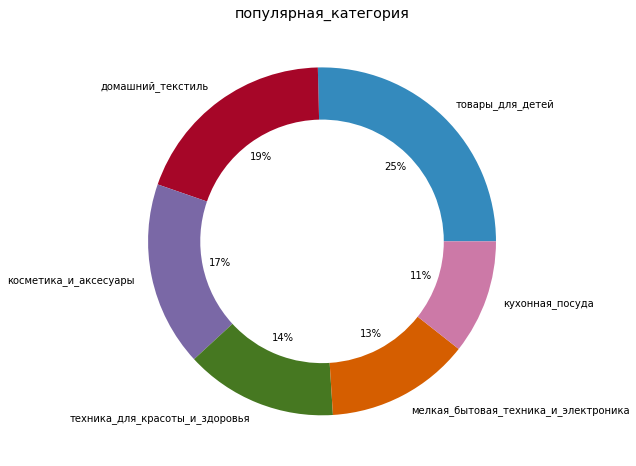

In [38]:
get_info(df_market, 'популярная_категория')

* Товары для детей  являются самой популярной категорией, которую предпочитают 330 покупателей.
* Домашний текстиль занимает второе место по популярности с 251 покупателем.
* Косметика и аксессуары находятся на третьем месте с 223 покупателями.
*  Техника для красоты и здоровья, мелкая бытовая техника и электроника и кухонная посуда  менее популярны, чем первые три категории, с 184, 174 и 138 покупателями соответственно.

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64


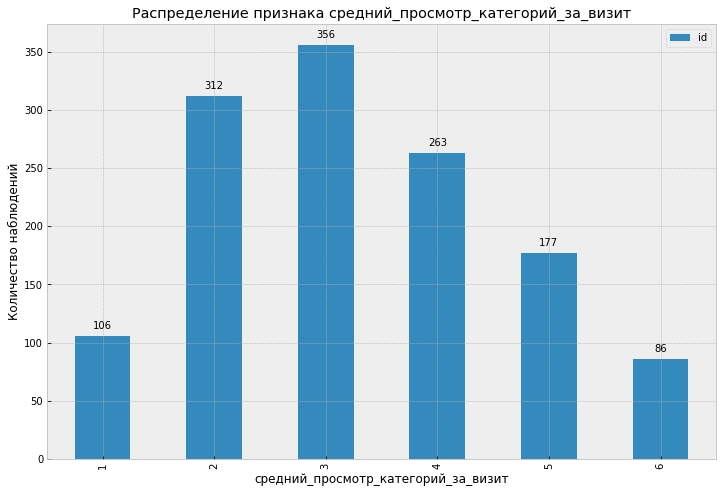

In [39]:
get_info(df_market, 'средний_просмотр_категорий_за_визит')

* В среднем, покупатели проявляют интерес к нескольким категориям товаров, просматривая в среднем 3-4 категории за визит. 
* Существует некоторая вариативность в поведении покупателей, о чем свидетельствует стандартное отклонение 1.36. 
* Часть покупателей демонстрируют узкий интерес, фокусируясь на одной-двух категориях, в то время как другая часть проявляют более широкий интерес, просматривая 4 и более категорий за визит.

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


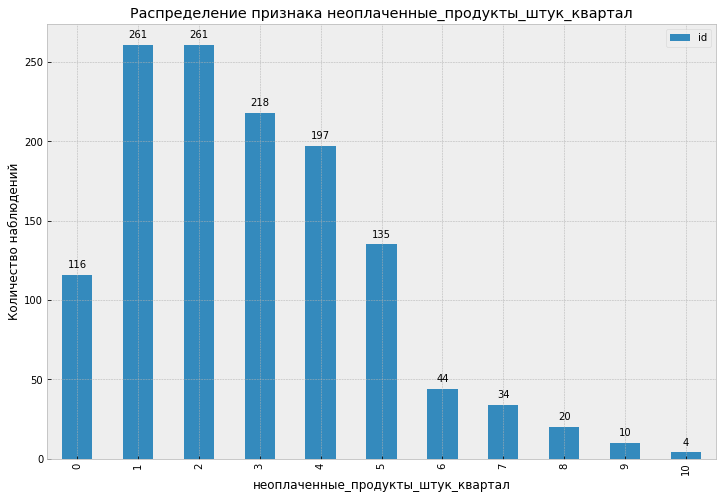

In [40]:
get_info(df_market, 'неоплаченные_продукты_штук_квартал')

Хотя среднестатистический покупатель оставляет около 3 товаров в корзине без оплаты каждый квартал,  существует большой разброс в этом показателе: от 0 до 10 товаров.

Есть две версии, почему покупатели не оплачивают товары в корзине:

* Отложенный спрос: Покупатели могут добавлять товары в корзину, чтобы "сохранить" их на будущее, когда будут готовы к покупке, например, дождаться зарплаты или более подходящего момента.
* Технические сложности: Процесс оформления заказа может быть неудобным или содержать ошибки, препятствующие оплате. Например,  сложный интерфейс,  недостаточно информации о доставке или  сбои в системе оплаты. 

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


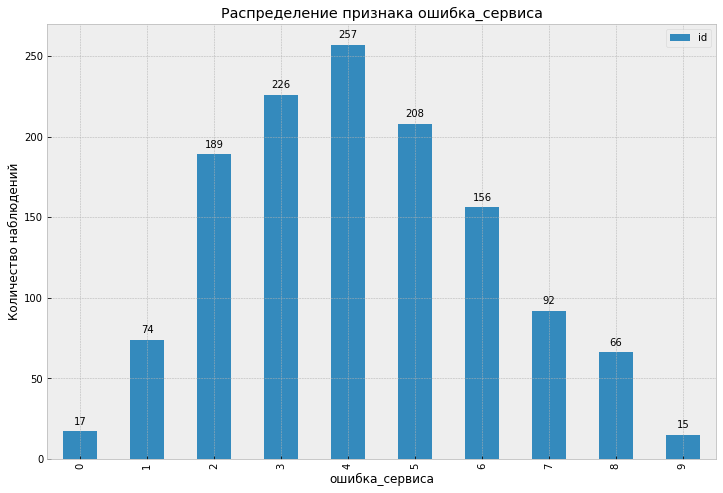

In [41]:
get_info(df_market, 'ошибка_сервиса')

Медианное значение в 4 ошибки на пользователя  является тревожным сигналом.  Это  указывает  на  системные  проблемы в  сервисе,  которые  негативно  влияют на  пользовательский  опыт.   Максимальное  значение  в 9  ошибок  подтверждает  наличие  серьезных  проблем  в  работе сервиса.


count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


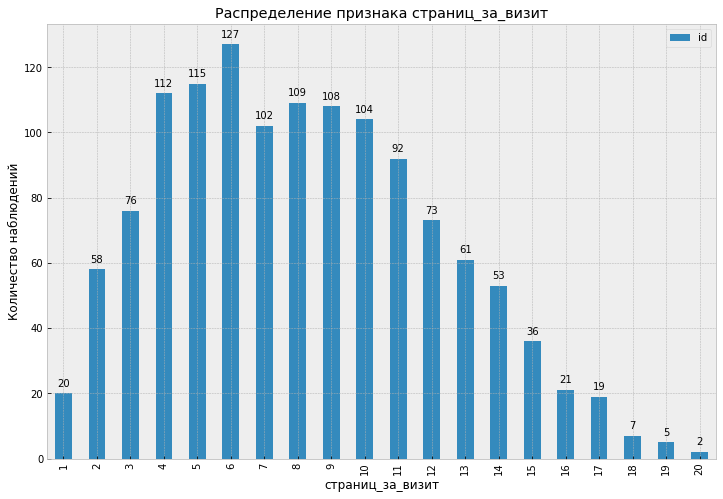

In [42]:
get_info(df_market, 'страниц_за_визит')

* В  среднем,  пользователи  достаточно  активно  изучают  платформу,  просматривая  в  среднем  8  страниц  за  один  визит. 
*  Существует  разнообразие  в  поведении  пользователей:  некоторые  просматривают  лишь  несколько  страниц,  в  то  время  как  другие  демонстрируют  высокую  степень  вовлеченности,  просматривая  до  20  страниц. 

<div style="background-color: Gainsboro; padding: 10px"> <b>df_market_money</b> 
</div>

препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: период, dtype: int64


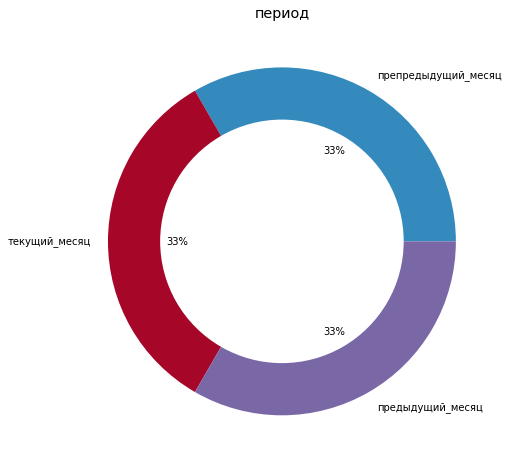

In [43]:
get_info(df_market_money, 'период')

Для  каждого  из  трех  месяцев  имеется  информация  о  1300  пользователях. 

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64


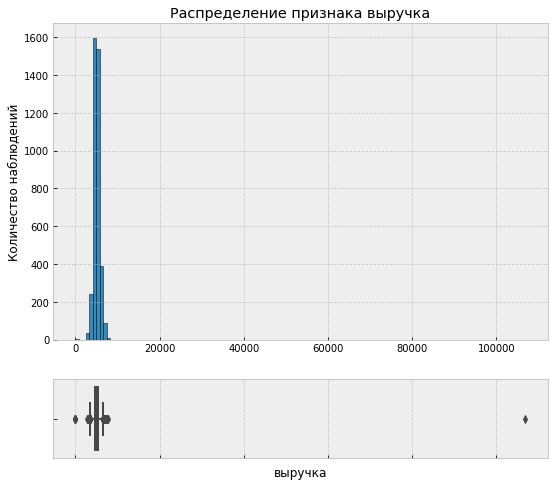

In [44]:
get_info(df_market_money, 'выручка')

Рассмотрим аномальное значение поближе

In [45]:
df_market_money[df_market_money['выручка'] > 100000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [46]:
df_market_money[df_market_money['id'] == 215380]

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


In [47]:
df_market
df_market[df_market['id'] == 215380]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,снизилась,премиум,нет,1.7,4,637,0.94,техника_для_красоты_и_здоровья,3,2,4,7


Анализ динамики выручки пользователя показывает её рост в течение последних трёх месяцев. Однако, данные из таблицы df_market свидетельствуют о снижении покупательской способности пользователя. 

В связи с этим, для корректного отражения ситуации, предлагаю заменить аномально высокое значение выручки в текущем месяце на среднее значение между двумя предыдущими месяцами. Такой подход позволит сгладить возможное искажение данных и учесть наблюдаемую тенденцию снижения покупательской активности.

In [48]:
df_market_money.loc[(df_market_money['выручка'] == 106862.2), 'выручка'] =\
df_market_money.query('id == 215380 and выручка < 100000')['выручка'].mean()

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, выброс обработан!</div>

count    3900.000000
mean     4999.722154
std       706.966984
min         0.000000
25%      4590.150000
50%      4957.500000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64


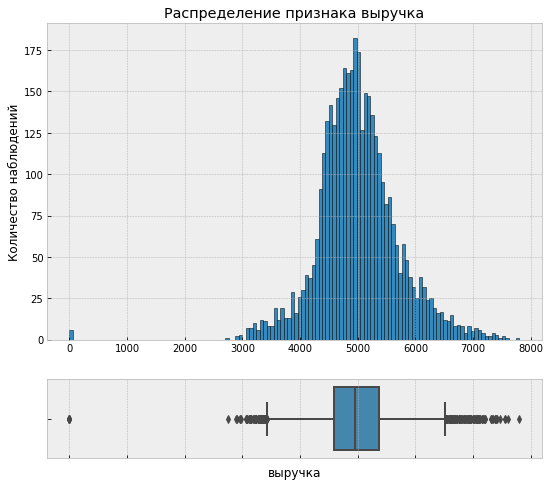

In [49]:
get_info(df_market_money, 'выручка')

In [50]:
df_market_money[df_market_money['выручка'] == 0]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Присутствие данных с нулевой выручкой указывает на то, что часть покупателей являются новыми клиентами, которые начали пользоваться магазином только в текущем месяце и, соответственно, еще не совершали покупок в предыдущие периоды.

<div style="background-color: Gainsboro; padding: 10px"> <b>df_market_time</b> 
</div>

текущий_месяц       1300
предыдущий_месяц    1300
Name: период, dtype: int64


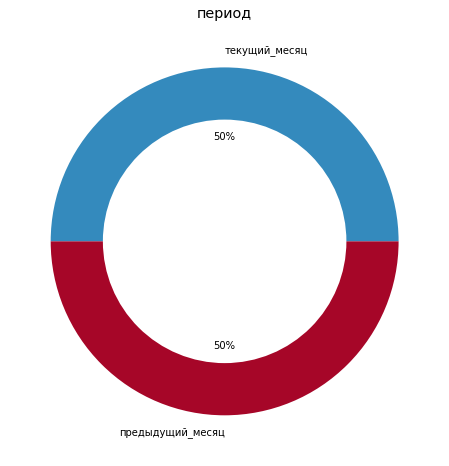

In [51]:
get_info(df_market_time, 'период')

Равное количество посещений в предыдущем и текущем месяце (1300).

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


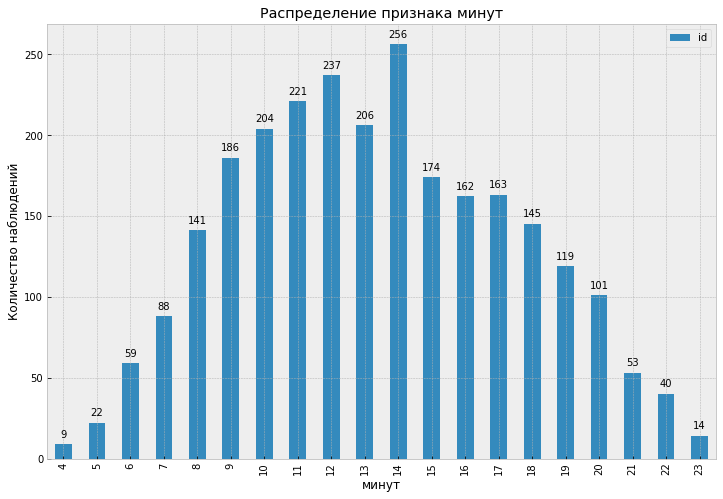

In [52]:
get_info(df_market_time, 'минут')

Данные показывают, что в среднем пользователи проводят на сайте 13.34 минуты.
- Минимальное время, проведенное на сайте – 4 минуты, что может говорить о пользователях, которые быстро нашли нужную информацию или не заинтересовались контентом.
- Максимальное время – 23 минуты, указывает на пользователей, которые были  глубоко вовлечены в контент сайта.

<div style="background-color: Gainsboro; padding: 10px"> <b>df_money</b> 
</div>

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


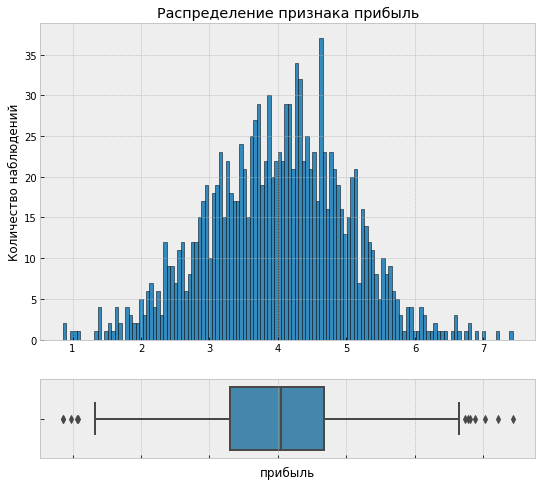

In [53]:
get_info(df_money, 'прибыль')

- Средняя прибыль близка к медиане (4.045), что говорит о том, что распределение не имеет сильных выбросов.
- Стандартное отклонение (1.013722) относительно невелико, что указывает на то, что прибыль от большинства покупателей находится в пределах одного стандартного отклонения от среднего значения.
- 25% покупателей приносят прибыль менее 3.30, а 75% покупателей приносят прибыль менее 4.67. 
- Минимальная прибыль составляет 0.86, а максимальная – 7.43. 

Для выбора пользователей, проявлявших покупательскую активность не менее трёх месяцев, достаточно использовать данные из таблицы df_market_money. Эта таблица содержит информацию о среднемесячной прибыли каждого покупателя за последние три месяца.

In [54]:
df_market_money_full = df_market_money.pivot_table(index='id', values='выручка', aggfunc='sum')
df_market_money_full[df_market_money_full['выручка'] == 0].count()

выручка    0
dtype: int64

Отсутствие нулевых значений в таблице свидетельствует о том, что все пользователи совершали покупки в течение рассматриваемого периода.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> 
    
1. Баланс целевого признака:

- Целевой признак (предположительно, связанный с поведением покупателей) имеет приемлемый баланс классов (62% и 38%), что позволяет использовать стандартные методы анализа без необходимости коррекции на дисбаланс.

2. Использование сервиса и коммуникации:

- Большинство клиентов (71%) пользуются стандартным сервисом, 29% предпочитают премиум.
- Большая часть клиентов (74%) дала согласие на получение сообщений, что открывает возможности для маркетинговых кампаний.

3. Маркетинговая активность и длительность взаимодействия:

- Клиенты демонстрируют хороший уровень маркетинговой активности за последние 6 месяцев (среднее значение 4.2538, медиана 4.2).
- Данные о длительности взаимодействия с сайтом указывают на наличие локальных пиков и спадов, возможно связанных с проведением маркетинговых активностей.

4. Отношение к акциям и популярность категорий:

-  Наблюдается сегментация покупателей по отношению к акциям:  часть клиентов совершает покупки вне зависимости от наличия скидки, а другая часть приобретает товары только в период действия акций.
- "Товары для детей" – самая популярная категория, за ними следуют "Домашний текстиль" и "Косметика и аксессуары".
- Категории "Техника для красоты и здоровья", "Мелкая бытовая техника и электроника" и "Кухонная посуда" менее популярны.

5. Интерес к категориям и неоплаченные товары:

- В среднем, покупатели просматривают 3-4 категории товаров за визит, но существует вариативность в поведении (стандартное отклонение 1.36).
- Среднестатистический покупатель оставляет около 3 товаров в корзине без оплаты каждый квартал (разброс от 0 до 10 товаров).
- Возможные причины: отложенный спрос или технические сложности при оформлении заказа.

6. Ошибки в сервисе:

- Медианное значение в 4 ошибки на пользователя  указывает на системные проблемы в сервисе. 
- Максимальное значение в 9 ошибок подтверждает наличие серьезных проблем, требующих немедленного внимания.

7. Активность пользователей на платформе:

- Пользователи достаточно активно изучают платформу, просматривая в среднем 8 страниц за визит.
- Существует разнообразие в поведении: некоторые просматривают лишь несколько страниц, другие демонстрируют высокую вовлеченность (до 20 страниц).

8. Динамика и распределение выручки:

- Анализ динамики выручки пользователя показывает её рост в течение последних трёх месяцев.
- Однако, данные о покупательской способности свидетельствуют о её снижении.
- Обнаружено аномально высокое значение выручки в текущем месяце, которое рекомендуется заменить на среднее значение между двумя предыдущими месяцами.
- Распределение выручки близко к нормальному (среднее и медиана около 5000).
- Присутствие данных с нулевой выручкой указывает на новых клиентов, которые еще не совершали покупок.

9. Время, проведенное на сайте, и прибыль с покупателя:

- Количество посещений сайта стабильно (1300 в предыдущем и текущем месяце).
- В среднем пользователи проводят на сайте 13.34 минуты (минимум 4 минуты, максимум 23 минуты).
-  Распределение прибыли с покупателя нормально и симметрично (средняя прибыль близка к медиане – 4.045).
- Стандартное отклонение прибыли относительно невелико (1.013722).
- 25% покупателей приносят прибыль менее 3.30, а 75% – менее 4.67 (минимум 0.86, максимум 7.43).
</div>

## Объединение таблиц

In [55]:
df_market_money = df_market_money.pivot_table(index='id', columns='период', values='выручка').reset_index()
df_market_money.columns.name = None

In [56]:
df_market_money.head(3)

,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4


In [57]:
df_market_money.columns = ['id', 'выручка_предыдущий_месяц', 
                           'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']

In [58]:
df_market_time = df_market_time.pivot_table(index='id', columns='период', values='минут').reset_index()
df_market_time.columns.name = None

df_market_time.columns = ['id', 'минут_предыдущий_месяц', 'минут_текущий_месяц']

In [59]:
df_market_time.head(3)

,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13


In [60]:
print(f'Размер датафрейма до слияния: {df_market.shape}')
df = df_market.merge(df_market_money, on='id').merge(df_market_time, on='id')
print(f'Размер датафрейма после слияния: {df.shape}')

Размер датафрейма до слияния: (1300, 13)
Размер датафрейма после слияния: (1300, 18)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> в данном разделе мы успешно объединили таблицы df_market, df_market_money и df_market_time для формирования единого набора данных.

В результате выполненных действий мы получили объединённый датафрейм df размером 7800 строк и 20 столбцов. Этот датафрейм содержит всю необходимую информацию для дальнейшего анализа и моделирования. 

Важно отметить, что в итоговом датафрейме пропущенные значения отсутствуют, что подтверждает качество объединения и целостность данных. Это позволяет перейти к следующему этапу. 
</div>

## Корреляционный анализ

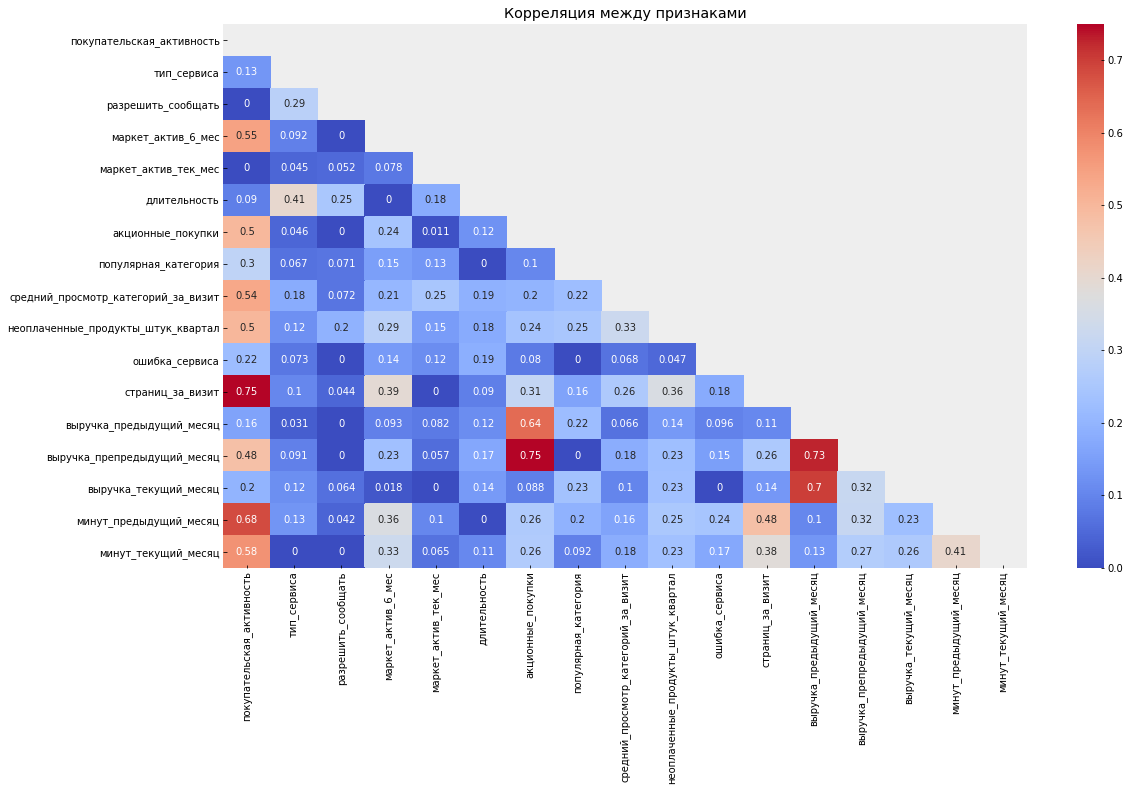

In [62]:
nam_col_names = df.drop('id', axis=1).select_dtypes(include='number').columns.tolist()

phik_matrix = df.drop('id', axis=1).phik_matrix(interval_cols=nam_col_names)

mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

plt.figure(figsize=(18, 10))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Корреляция между признаками')
plt.show()

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> с целевым признаком 'покупательская_активность' наиболее сильно коррелирует признак 'страниц_за_визит' с коэффициентом корреляции 0.75. На втором месте находится признак 'минуты_предыдущий_месяц' с корреляцией 0.68 и 'минуты_текущий_месяц' с корреляцией 0.58. Третье место разделили признаки 'маркет_актив_6_мес' с корреляцией 0.55 и 'средний_просмотр_категорий_за_визит' с корреляцией 0.54.

Самая низкая корреляция наблюдается с признаками 'разрешить_сообщать' и 'маркет_актив_тек_мес' (коэффициент корреляции 0), 'длительность' (0.09) и 'тип_сервиса' (0.13).
    
"Признаки 'выручка_текущий_месяц' и 'выручка_предыдущий_месяц'  мультиколлинеарны.  Но  эта  взаимосвязь  не  слишком  высокая  и  не  влияет  на  целевой  признак. 
</div>

## Использование пайплайнов

Перед построением пайплайна предлагается заменить индексы DataFrame df на id покупателей.  Это  обусловлено  тем,  что  в  случае  удаления  столбца  'id'  из  данных  для  обучения  и  тестирования  возникнут  сложности  на  этапе  анализа  сегмента  (шаг  9),  а  именно  при  объединении  с  df_money.  Если  же  столбец  'id'  оставить,  модель  может  переобучиться  на  этом  признаке,  пренебрегая  остальными,  что  приведет  к  искусственно  высокому  значению  метрики  ROC-AUC  (равному  1).

При выборе подходящей метрики приоритетным является обеспечение баланса между precision и recall, так как перекос в сторону одного из них может привести к искажению результатов.  В данной задаче целесообразно использовать F1-меру или ROC-AUC.  Однако, учитывая  незначительный  дисбаланс  целевого  признака  (62%  против  38%),  предпочтение  отдается  ROC-AUC,  так  как  эта  метрика  менее  чувствительна  к  соотношению  классов  и  обладает  более  интуитивно  понятной  интерпретацией:  значение  ROC-AUC  представляет  собой  вероятность  того,  что  модель  правильно  отранжирует  случайно  выбранный  положительный  объект  выше  случайно  выбранного  отрицательного.

In [63]:
df = df.set_index('id')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['покупательская_активность'], axis=1),
    df['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['покупательская_активность'])

In [65]:
print(f'Размер X_train: {X_train.shape}')
print(f'Размер y_train: {y_train.shape}')
print()
print(f'Размер X_test: {X_test.shape}')
print(f'Размер y_test: {y_test.shape}')

Размер X_train: (975, 16)
Размер y_train: (975,)

Размер X_test: (325, 16)
Размер y_test: (325,)


In [66]:
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = df.select_dtypes(include='number').columns.tolist()

In [67]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)


In [68]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [69]:

param_grid = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__max_features': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': range(1, 10),
        'models__kernel': ['rbf', 'linear', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
] 

In [70]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_...
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 10),
                                         'models__kernel': ['rbf', 'linear',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [71]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(str...
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'выручка_предыдущий_месяц',
                                                   'выручка_препредыдущий_месяц',
                                                   'выручка_текущий_месяц',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц'])])),
                ('models', KNeighborsClassifier(n_neighbors=17))])

In [72]:
randomized_search.best_score_

0.8665734494825404

In [73]:
y_predict_proba = randomized_search.predict_proba(X_test)

In [74]:
roc_auc_score(y_test, y_predict_proba[:, 1])

0.8816401861659445

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> на данном этапе разработан пайплайн, осуществляющий предобработку данных для обучения модели. Пайплайн включает в себя кодирование категориальных признаков (столбцы из переменной ohe_columns) с помощью OneHotEncoder, кодирование ранговых признаков (столбцы из ord_columns) с помощью OrdinalEncoder, а также масштабирование числовых признаков (столбцы из num_columns) с использованием StandardScaler, MinMaxScaler или без масштабирования. После предобработки данных пайплайн обучает модель, выбирая наилучшую из KNeighborsClassifier, DecisionTreeClassifier, SVC и LogisticRegression на основе метрики ROC-AUC. При выборе модели также учитывается оптимальная комбинация гиперпараметров.
    
По завершении работы RandomizedSearchCV (выбранного для более бытрой работы алгоритма)  наилучшей моделью  оказался  KNeighborsClassifier с количеством ближайших соседей, равным 17.  На обучающей выборке модель достигла значения метрики  0.867,  а на тестовой - 0.882.
</div>

## Анализ важности признаков

In [75]:
# Получение лучшей модели
best_pipeline = randomized_search.best_estimator_

# Извлечение модели из пайплайна
model = best_pipeline.named_steps['models']

X_train_shap = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].fit_transform(X_train), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)
X_test_shap = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].transform(X_test), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)

In [76]:
explainer = shap.Explainer(model.predict_proba, X_train_shap[:10])
shap_values = explainer(X_test_shap[:10])

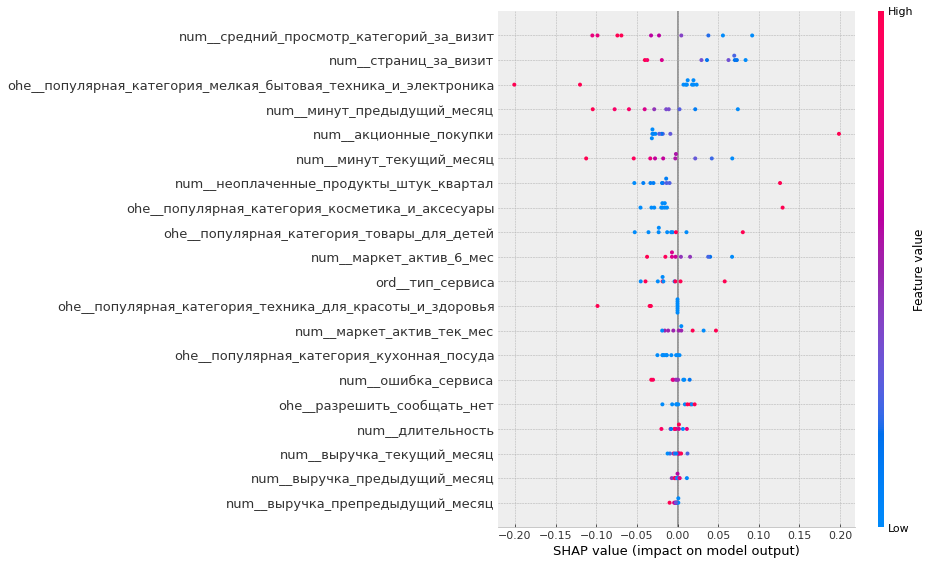

In [77]:
shap.plots.beeswarm(shap_values[:,:,1], max_display = 21) 

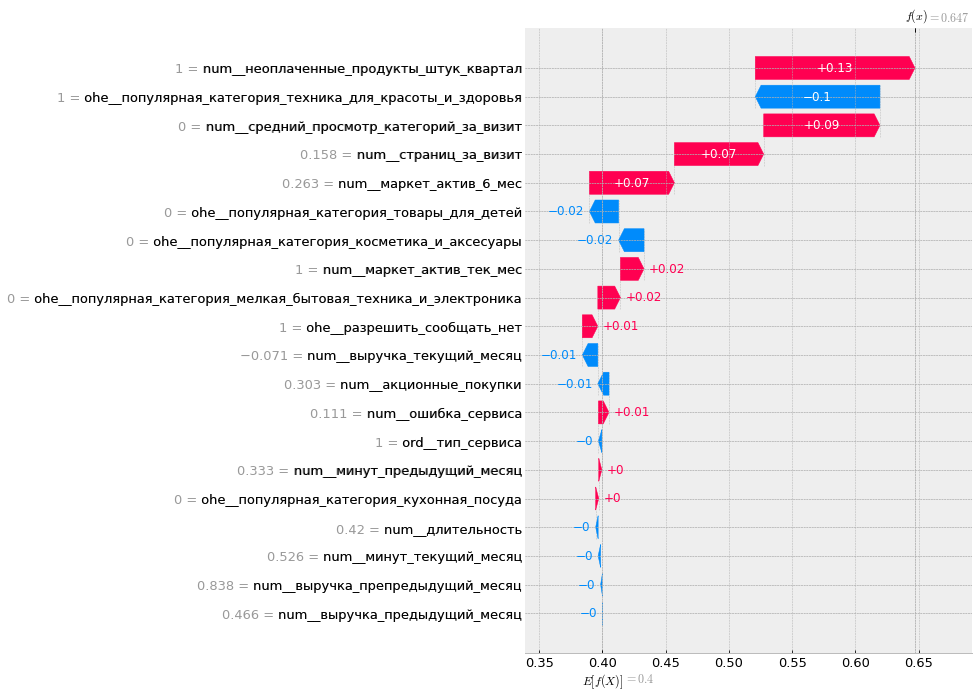

In [78]:
shap.plots.waterfall(shap_values[1,:,1], max_display = 21)

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b>

анализ важности признаков выявил следующие наиболее значимые факторы: 
1. Среднее количество просмотренных категорий за визит;
2. Количество страниц, просмотренных за визит;
3. Количество минут, проведенных на сайте в предыдущем месяце;
4. Популярность категории "мелкая бытовая техника и электроника";
5. Количество акционных покупок.

Менее значимыми оказались следующие признаки:
1. Выручка за предыдущий и препредыдущий месяцы;
2. Длительность с момента регистрации;
3. Выручка за текущий месяц.
</div>


## Сегментация покупателей

Для проведения анализа сегментов целесообразно объединить X_train, X_test и df_money и добавить столбец с вероятностями предсказания целевого признака. Это позволит получить единый DataFrame, содержащий всю необходимую информацию для анализа.

In [79]:
X_train['шанс_снижения_активности'] = randomized_search.predict_proba(X_train)[:,1]

In [80]:
X_test['шанс_снижения_активности'] = randomized_search.predict_proba(X_test)[:,1]

In [81]:
df_segment = pd.concat([X_train, X_test]).merge(df_money, on='id')

В рамках анализа сегментов фокус будет направлен на группу клиентов, характеризующуюся высокой вероятностью снижения покупательской активности, но при этом обладающей наибольшей прибыльностью.

Выбор данного сегмента клиентов обусловлен тем, что их отток может привести к наиболее существенным финансовым потерям для бизнеса.

In [82]:
df_max_profit = df_segment.loc[(df_segment['прибыль'] > 4) & (df_segment['шанс_снижения_активности'] > 0.7)]

count     116.000000
mean      590.310345
std       215.012575
min       163.000000
25%       456.250000
50%       587.000000
75%       754.500000
max      1051.000000
Name: длительность, dtype: float64


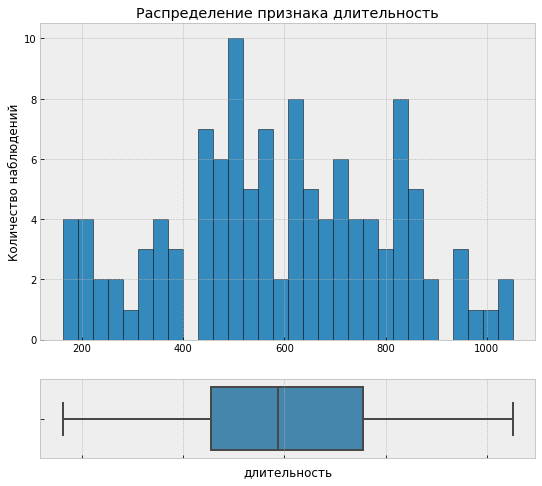

In [83]:
get_info(df_max_profit, 'длительность', 30)

Клиенты, входящие в выбранный сегмент,  демонстрируют длительный период взаимодействия с интернет-магазином.  Самая ранняя регистрация пользователя в данном сегменте была зафиксирована за 163 дня до момента формирования набора данных.

count    116.000000
mean       0.555345
std        0.325297
min        0.120000
25%        0.280000
50%        0.360000
75%        0.940000
max        0.990000
Name: акционные_покупки, dtype: float64


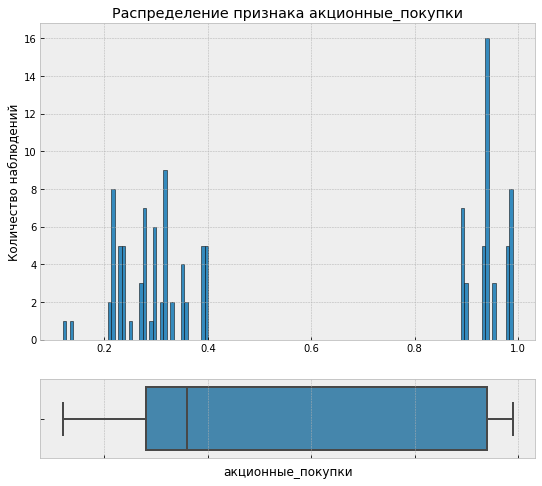

In [84]:
get_info(df_max_profit, 'акционные_покупки')

Клиенты, входящие в выбранный сегмент, демонстрируют высокую  склонность к совершению покупок по акциям.  Возможно,  это  обусловлено  недостаточным  ассортиментом  акционных  товаров  или  более  выгодными  предложениями  у  конкурентов.

count    116.000000
mean       2.189655
std        1.029257
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: средний_просмотр_категорий_за_визит, dtype: float64


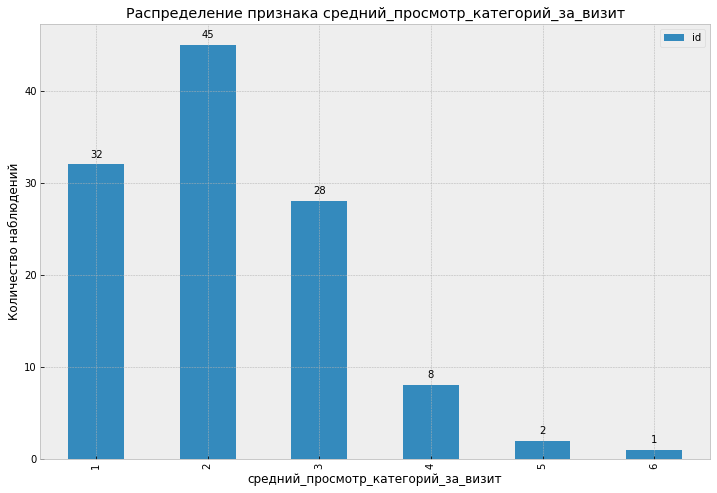

In [85]:
get_info(df_max_profit, 'средний_просмотр_категорий_за_визит')

count    116.000000
mean       4.043103
std        2.235649
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       14.000000
Name: страниц_за_визит, dtype: float64


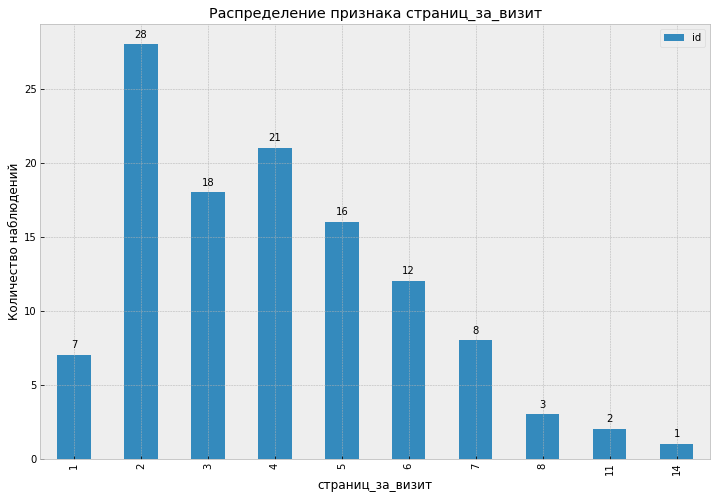

In [86]:
get_info(df_max_profit, 'страниц_за_визит')

Учитывая, что выбранный сегмент просматривает в среднем всего 2 категории и 2 страницы, что влечет за собой:
1. Снижение  вероятности  покупки:  Если  клиент  просматривает  мало  товаров  и  категорий,  вероятность  того,  что  он  найдет  что-то  интересное  и  совершит  покупку,  значительно  снижается.
2. Упущенная  выгода:  Клиент,  который  не  знаком  со  всем  ассортиментом  интернет-магазина,  может  пропустить  товары,  которые  ему  действительно  нужны  и  интересны.  Это  приводит  к  упущенной  выгоде  для  бизнеса.
3. Снижение  лояльности:  Клиенты,  которые  не  находят  нужных  товаров  или  не  удовлетворены  ассортиментом,  могут  перейти  к  конкурентам.  Это  приводит  к  снижению  лояльности  клиентов  и  увеличению  расходов  на  привлечение  новых  покупателей.

стандарт    75
премиум     41
Name: тип_сервиса, dtype: int64


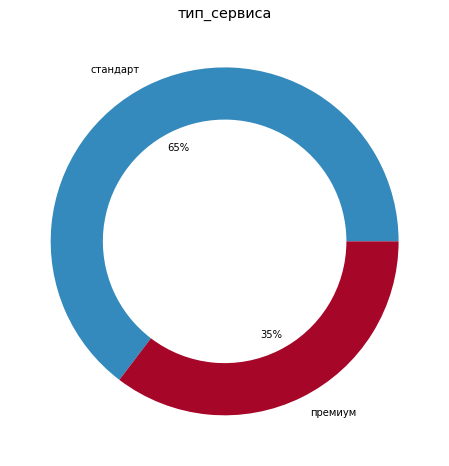

In [87]:
get_info(df_max_profit, 'тип_сервиса')

Большинство клиентов (65%) не подключили премиум сервис.  Стоит разобраться, какие преимущества он дает.

товары_для_детей                  49
косметика_и_аксесуары             35
домашний_текстиль                 17
кухонная_посуда                   10
техника_для_красоты_и_здоровья     5
Name: популярная_категория, dtype: int64


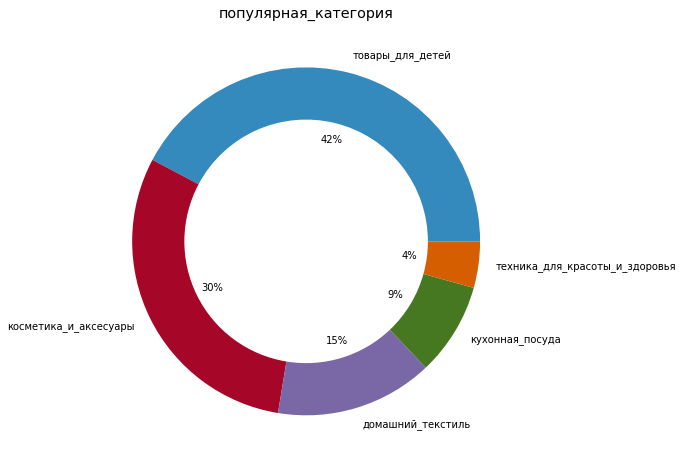

In [88]:
get_info(df_max_profit, 'популярная_категория')

Среди  товаров,  представленных  в  интернет-магазине,  наибольшей  популярностью  у  выбранного  сегмента  пользователей  пользуются  товары  для  детей  и  косметика/аксессуары.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> 
на основе представленного анализа можно сформулировать следующие рекомендации для интернет-магазина, направленные на удержание ценных клиентов из выделенного сегмента:

1.  Разработка программы лояльности для "давних" клиентов:

* Персональные  предложения  и  скидки:  Учитывая  длительный  период  взаимодействия  клиентов  с  магазином,  необходимо  разработать  систему  персональных  предложений  и  скидок,  основанных  на  истории  покупок  и  предпочтениях  каждого  клиента.
* Эксклюзивные  акции  и  мероприятия:  Организация  специальных  акций  и  мероприятий  для  "давних"  клиентов,  например,  закрытые  распродажи,  предварительный  доступ  к  новым  коллекциям,  подарки  ко  дню  рождения  или  годовщине  регистрации  в  магазине.
* Повышение  уровня  сервиса:  Предоставление  "давним"  клиентам  приоритетного  обслуживания,  например,  выделенная  линия  поддержки,  ускоренная  обработка  заказов,  персональный  менеджер.

2.  Оптимизация  ассортимента  и  ценовой  политики  акционных  товаров:

* Расширение  ассортимента  акционных  товаров:  Добавление  в  акционный  ассортимент  товаров  из  категорий,  пользующихся  спросом  у  выделенного  сегмента  (товары  для  детей,  косметика/аксессуары).
* Анализ  цен  конкурентов:  Регулярный  мониторинг  цен  конкурентов  на  аналогичные  товары  и  корректировка  ценовой  политики  с  целью  предложения  более  выгодных  условий.
* Разработка  системы  купонов  и  промокодов:  Предоставление  клиентам  возможности  использовать  купоны  и  промокоды  для  получения  дополнительных  скидок  на  акционные  товары.

3.  Стимулирование  изучения  ассортимента:

* Персонализированные  рекомендации  товаров  и  категорий:  Внедрение  системы  рекомендаций,  учитывающей  интересы  и  предпочтения  клиента,  направленной  на  знакомство  с  новыми  категориями  и  товарами.
* Улучшение  навигации  по  сайту:  Создание  интуитивно  понятной  структуры  сайта,  удобной  системы  фильтрации  и  поиска  товаров.
* Разработка  контент-маркетинговой  стратегии:  Создание  интересного  и  полезного  контента  (обзоры,  статьи,  видео)  о  товарах  и  категориях,  который  будет  стимулировать  клиентов  к  их  изучению.

4.  Повышение  привлекательности  премиум  сервиса:

* Анализ  причин  низкой  востребованности:  Проведение  исследования  для  выявления  причин,  по  которым  большинство  клиентов  не  подключает  премиум  сервис.
* Расширение  пакета  преимуществ:  Добавление  в  премиум  пакет  новых  привлекательных  услуг  и  возможностей,  например,  бесплатная  доставка,  повышенный  кэшбэк,  доступ  к  закрытым  распродажам.
* Информирование  клиентов  о  преимуществах  премиум  сервиса:  Разработка  информационных  материалов  и  проведение  маркетинговых  кампаний,  направленных  на  популяризацию  премиум  сервиса  и  его  преимуществ.
    
Для более глубокого понимания  аудитории  и  повышения  эффективности  маркетинговых  активностей  рекомендуется  расширить  объем  собираемых  данных  о  покупателях,  включая  демографические  характеристики,  такие  как  пол,  возраст  и  географическое  местоположение.
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Молодец, в разделе выбора сегмента и разработки маркетинговых предложений по увеличению покупательской активности для него я не вижу никаких проблем. Проведен и аналитический и графический анализ, в выводе находится саммари по всем, наиболее значимым поинтам анализа. Что же касается рекомендаций, то конечно здесь написать можно много ... твой анализ (и графики для признаков) дают массу полезной информации о характеристиках 2х групп покупателей. Написать можно много, но для начала достаточно и тех моментов, которые упоминаешь здесь ты. Молодец!
</div>

## Общий вывод

<div style="background-color: PaleTurquoise; padding: 20px"> 
Цель: Разработать решение для персонализации предложений постоянным клиентам с целью повышения их активности и, как следствие, увеличения выручки интернет-магазина "В один клик".

Исходные данные: Четыре таблицы (df_market, df_market_money, df_market_time, df_money), содержащие информацию о клиентах, их покупках, времени совершения покупок и выручке.

Первичный анализ данных показал:

* Полнота данных: Все таблицы содержат полные данные без пропущенных значений.
* Корректность типов данных: Типы данных в столбцах соответствуют ожидаемым форматам.
* Согласованность данных: Номера id в таблицах согласованы, что позволяет объединять данные.

Необходимые шаги предобработки данных:

1. Унификация названий столбцов: Приведение к нижнему регистру и замена пробелов на символ подчеркивания.
2. Унификация строковых значений: Приведение к нижнему регистру.
3. Устранение неявных дубликатов: 
    * Исправление опечатки в столбце "тип сервиса".
    * Проверка и исправление дубликатов в столбце "популярная_категория".

Результаты предобработки:

* Все датафреймы унифицированы по названиям столбцов и значениям категориальных переменных.
* Неявные дубликаты в столбце "тип_сервиса" устранены.

Разработанный пайплайн:

* Автоматизирует предобработку данных, включая кодирование категориальных и ранговых признаков, а также масштабирование числовых признаков.
* Обучает и выбирает наилучшую модель из KNeighborsClassifier, DecisionTreeClassifier, SVC и LogisticRegression на основе метрики ROC-AUC.
* Оптимизирует гиперпараметры выбранной модели с помощью RandomizedSearchCV.

Результаты:

* Наилучшей моделью оказался KNeighborsClassifier (k=17).
* ROC-AUC на обучающей выборке: 0.867.
* ROC-AUC на тестовой выборке: 0.882.

Анализ важности признаков:

Наиболее значимые:

1. Среднее количество просмотренных категорий за визит.
2. Количество страниц, просмотренных за визит.
3. Количество минут, проведенных на сайте в предыдущем месяце.
4. Популярность категории "мелкая бытовая техника и электроника".
5. Количество акционных покупок.

Менее значимые:

1. Выручка за предыдущий и препредыдущий месяцы.
2. Длительность с момента регистрации.
3. Выручка за текущий месяц.

Рекомендации для интернет-магазина:

1. Разработка программы лояльности для "давних" клиентов:

* Персонализированные предложения и скидки: Анализ истории покупок и предпочтений для формирования индивидуальных предложений.
* Эксклюзивные акции и мероприятия: Закрытые распродажи, ранний доступ к новинкам, подарки.
* Повышение уровня сервиса: Приоритетная поддержка, ускоренная обработка заказов, персональный менеджер.

2. Оптимизация ассортимента и ценовой политики акционных товаров:

* Расширение ассортимента: Включение товаров из популярных категорий (товары для детей, косметика).
* Анализ цен конкурентов: Мониторинг и корректировка цен для обеспечения конкурентных преимуществ.
* Система купонов и промокодов: Дополнительные скидки на акционные товары.

3. Стимулирование изучения ассортимента:

* Персонализированные рекомендации: Предложение товаров и категорий на основе интересов клиента.
* Улучшение навигации: Интуитивно понятная структура сайта, удобные фильтры и поиск.
* Контент-маркетинг: Создание интересного контента (обзоры, статьи) о товарах и категориях.

4. Повышение привлекательности премиум сервиса:

* Анализ потребностей клиентов: Выявление причин низкой популярности премиум-сервиса.
* Разработка дополнительных преимуществ:  Расширение привилегий для пользователей премиум-сервиса.
* Продвижение премиум-сервиса: Информирование клиентов о преимуществах и ценности премиум-подписки. 
</div>